# Visualização e estudo dos dados
## Bibliotecas necessárias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as pff
import plotly.graph_objects as pgo
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from statsmodels.stats import outliers_influence as outinf

O dado foi obtido da biblioteca sklearn.datasets e conta com o dataset, um array com nome das colunas, o target e uma descrição dos parâmetros.

In [3]:
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
# Incorporação dos dados em um dataframe pandas
data = pd.DataFrame(boston.data, columns = boston.feature_names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
# Adição dos dados MEDV (target) no dataframe
data['MEDV'] = boston.target

In [6]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Análise dos dados
Os dados já foram inseridos em um DataFrame Pandas, e agora devem ser analisados.
Inicialmente será feita análise descritiva, bem como análise do dataframe em busca de valores 0 e valores NaN.

In [7]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [9]:
for x in data.columns:
    if data[x].isin([0]).sum() > 0:
        print(f'isin0 {x} = {data[x].isin([0]).sum()}')
    if data[x].isna().sum() > 0:
        print(f'isna {x} = {data[x].isna().sum()}')

isin0 ZN = 372
isin0 CHAS = 471


- Nenhuma variável tem missing value;
- A variável CHAS é uma variável categórica binomial (0 ou 1), portanto é normal ter muitoz valores 0;
- A variável ZN é quantitativa contínua, e a quantidade de 0 pode atrapalhar o modelo de machine learning, por isso será excluida.

In [10]:
# Eliminando ZN
newcolumns = []
for x in data.columns:
    if x != 'ZN':
        newcolumns.append(x)
data = data[newcolumns]
data.head()

,CRIM,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Análise da variável alvo
Tendo em vista que já excluimos as interferencias causadas por missing values ou por uma quantidade excessiva de zeros, vamos agora estudar nossa variável alvo MEDV.

In [11]:
data['MEDV'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

In [12]:
fig = px.histogram(data, x=data['MEDV'])
fig.show()

In [13]:
fig = pff.create_distplot([data['MEDV']], group_labels = ['MEDV'])
fig.update_layout(width = 800, height = 500)
fig.show()

In [14]:
fig = px.box(data, y=data['MEDV'])
fig.show()

- Pode-se ver que tem alguns valores discrepantes em MEDV, incluindo o valor máximo que se destacou no final do histograma, tendo alguns casos;
- Além disso o boxplot considera limite superior como 37.

In [15]:
max_values = []
upper_fence_values = []
for i, v in enumerate(data['MEDV']):
    if v == 50:
        max_values.append(i)
    if v > 37:
        upper_fence_values.append(i)
# Número de imóveis cujo MEDV = 50, e cujo MEDV > 37
print(len(max_values))
print(len(upper_fence_values))

16
37


Criando dois dataframes:
- Em data_drop_max foram excluidos as linhas com valor MEDV = 50
- Em data_drop_upperfence foram excluidos todas as linhas com valor MEDV > upper_fence

In [16]:
data_drop_max = data.drop(max_values)
data_drop_upperfence = data.drop(upper_fence_values)

### Avaliando correlações
Agora que já conhecemos nossa variável alvo e tratamos os valores discrepantes, iremos avaliar as correlações entre as variáveis do dataframe

In [17]:
corrDropMax = data_drop_max.corr()

In [18]:
corrDropUpper = data_drop_upperfence.corr()

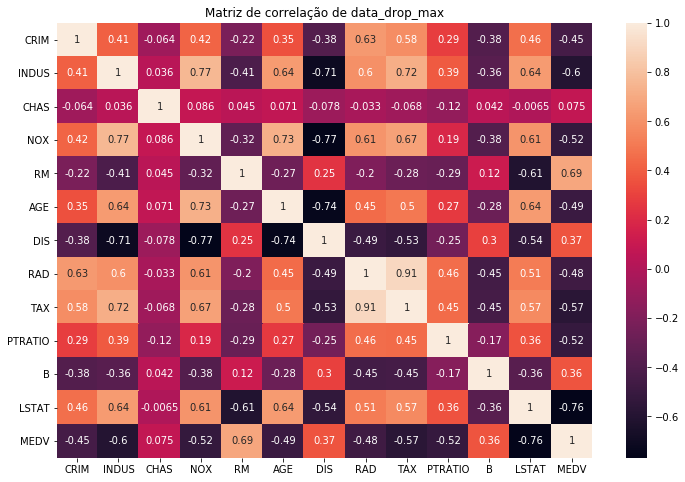

In [19]:
plt.figure(figsize=(12,8))
sns.heatmap(corrDropMax, annot=True)
plt.title('Matriz de correlação de data_drop_max')
plt.show()

#### Devido a perda de algumas correlações importantes, o dataset utilizado daqui pra frente será data_drop_max.

#### Pode-se observar algumas correlações importantes.
- LSTAT, RM, TAX e INDUS tem uma boa correlação com MEDV, sendo importantes para o nosso modelo de MachineLearning;
- RAD e TAX tem uma correlação extremamente forte (0.91);
- DIS tem alta correlação com diversos parâmetros;
Pode-se retirar RAD e DIS para ver se diminuem essas 



In [23]:
data_drop_max.columns

Index(['CRIM', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [25]:
dataML = data_drop_max[['CRIM', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV']]

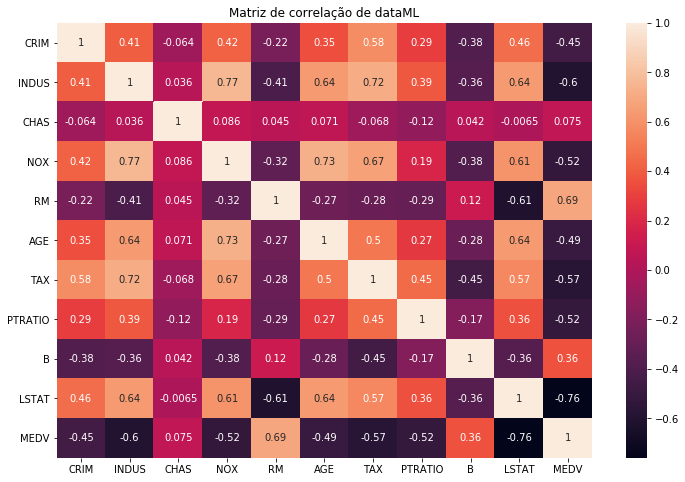

In [26]:
plt.figure(figsize=(12,8))
sns.heatmap(dataML.corr(), annot=True)
plt.title('Matriz de correlação de dataML')
plt.show()

In [27]:
dataML

,CRIM,INDUS,CHAS,NOX,RM,AGE,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,2.31,0.0,0.538,6.575,65.2,296.0,15.3,396.90,4.98,24.0
1,0.02731,7.07,0.0,0.469,6.421,78.9,242.0,17.8,396.90,9.14,21.6
2,0.02729,7.07,0.0,0.469,7.185,61.1,242.0,17.8,392.83,4.03,34.7
3,0.03237,2.18,0.0,0.458,6.998,45.8,222.0,18.7,394.63,2.94,33.4
4,0.06905,2.18,0.0,0.458,7.147,54.2,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,11.93,0.0,0.573,6.593,69.1,273.0,21.0,391.99,9.67,22.4
502,0.04527,11.93,0.0,0.573,6.120,76.7,273.0,21.0,396.90,9.08,20.6
503,0.06076,11.93,0.0,0.573,6.976,91.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,11.93,0.0,0.573,6.794,89.3,273.0,21.0,393.45,6.48,22.0


In [49]:
data_drop_max.columns

Index(['CRIM', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [59]:
dataVIFcolumns = []
for i in data_drop_max.columns:
    if i != 'MEDV':
        dataVIFcolumns.append(i)
dataVIF = data_drop_max[dataVIFcolumns]

In [60]:
dataVIF.head()

,CRIM,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [61]:
vif = pd.DataFrame()
vif["VIF Factor"] = [outinf.variance_inflation_factor(dataVIF.values, i) for i in range(dataVIF.shape[1])]
vif["features"] = dataVIF.columns

In [58]:
vif

,VIF Factor,features
0,2.083784,CRIM
1,14.317253,INDUS
2,1.152678,CHAS
3,73.839155,NOX
4,73.280986,RM
5,21.062725,AGE
6,11.854989,DIS
7,14.958813,RAD
8,58.067244,TAX
9,73.297996,PTRATIO


In [62]:
vif = pd.DataFrame()
vif["VIF Factor"] = [outinf.variance_inflation_factor(data_drop_max.values, i) for i in range(data_drop_max.shape[1])]
vif["features"] = data_drop_max.columns

In [63]:
vif

,VIF Factor,features
0,2.120217,CRIM
1,14.510911,INDUS
2,1.129719,CHAS
3,73.469579,NOX
4,169.825688,RM
5,21.428795,AGE
6,12.344067,DIS
7,14.695367,RAD
8,57.794152,TAX
9,82.850048,PTRATIO
